In [2]:
import numpy as np
import matplotlib.pyplot as mplot
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegressionCV as LGR
from sklearn.linear_model import LinearRegression as LNR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.svm import SVC as SVM
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading data from original file to take 15000 tuples.

In [3]:
# data_all = pd.read_excel('SWaT_Dataset_Normal_v0.xlsx')
# data_all = data_all.fillna(0)
# data_all.head()

### Select random 15000 tuples from normal data and sort it on time stamp
We are storing that data in group2_data.csv file for later uses

In [4]:
# #Store 15000 tuples from data
# group2_data=data_all.sample(n=15000)
# group2_data=group2_data.sort_values(by=group2_data.columns[0])
# group2_data.to_csv("group2_data.csv",sep=',',encoding='utf-8',index=False)
# group2_data.head()

## Reading data Normal and attack scenario
1. data_sel_nor is normal behavour data read from 15000 selected tuples
2. data_att is read from attack_merged.csv

In [5]:
data_sel_nor= pd.read_csv('group2_data.csv',delimiter=',')
print(data_sel_nor.shape)
data_sel_nor.head()

(15000, 53)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 10:00:58 PM,2.534670,502.7101,2,2,1,261.3753,8.338759,444.4501,2.463204,...,2,1,254.1015,1.169384,193.2037,0.000064,1,1,1,Normal
1,22/12/2015 10:01:16 PM,2.644525,501.4540,2,2,1,261.2471,8.342284,443.2710,2.462179,...,2,1,254.1656,1.121328,193.2037,0.000064,1,1,1,Normal
2,22/12/2015 10:01:45 PM,2.609615,500.5119,2,2,1,261.3432,8.341643,442.0661,2.466408,...,2,1,254.4860,1.089290,193.5401,0.000064,1,1,1,Normal
3,22/12/2015 10:02:32 PM,2.630753,502.6316,2,2,1,261.2791,8.341643,439.4514,2.462692,...,2,1,253.9573,1.057252,193.0114,0.152308,1,1,1,Normal
4,22/12/2015 10:02:51 PM,2.422253,500.6689,2,2,1,261.2791,8.341643,438.5799,2.463333,...,2,1,254.1816,1.249479,193.0595,0.000000,1,1,1,Normal


In [6]:
data_att=pd.read_csv('attack_merged.csv',delimiter=',')
print(data_att.shape)
data_att.head()

(4237, 53)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
0,28/12/2015 10:29:14 AM,2.493675,817.6742,2,1,1,262.625,8.46533,319.7385,0.0,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack1
1,28/12/2015 10:29:15 AM,2.535951,817.9490,2,1,1,262.625,8.46533,319.7385,0.0,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack1
2,28/12/2015 10:29:16 AM,2.535951,817.9490,2,1,1,262.625,8.46533,319.7385,0.0,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack1
3,28/12/2015 10:29:17 AM,2.569900,818.4592,2,1,1,262.625,8.46533,319.7385,0.0,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack1
4,28/12/2015 10:29:18 AM,2.610575,818.8911,2,1,1,262.625,8.46533,319.7385,0.0,...,2,1,250.0801,1.681991,188.9740,0.000128,1,1,1,Attack1


### Fixing issues with data
The data has different column names in attack data and normal data. We are finding the column names that are not same in both data and replacing the name in attack data with column name in normal data.

Then we merge both data to create on final table data_comb which represents combined data.

In [7]:
col_match=(data_sel_nor.columns!=data_att.columns)
for i in range(col_match.size):
    if col_match[i]:
        data_att.rename(columns={data_att.columns[i] : data_sel_nor.columns[i]},inplace=True)
frames=[data_sel_nor,data_att]
data_comb=pd.concat(frames,sort=False)
print(data_comb.shape)
data_comb.head()

(19237, 53)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 10:00:58 PM,2.534670,502.7101,2,2,1,261.3753,8.338759,444.4501,2.463204,...,2,1,254.1015,1.169384,193.2037,0.000064,1,1,1,Normal
1,22/12/2015 10:01:16 PM,2.644525,501.4540,2,2,1,261.2471,8.342284,443.2710,2.462179,...,2,1,254.1656,1.121328,193.2037,0.000064,1,1,1,Normal
2,22/12/2015 10:01:45 PM,2.609615,500.5119,2,2,1,261.3432,8.341643,442.0661,2.466408,...,2,1,254.4860,1.089290,193.5401,0.000064,1,1,1,Normal
3,22/12/2015 10:02:32 PM,2.630753,502.6316,2,2,1,261.2791,8.341643,439.4514,2.462692,...,2,1,253.9573,1.057252,193.0114,0.152308,1,1,1,Normal
4,22/12/2015 10:02:51 PM,2.422253,500.6689,2,2,1,261.2791,8.341643,438.5799,2.463333,...,2,1,254.1816,1.249479,193.0595,0.000000,1,1,1,Normal


#### Plotting the data to see the correlation between different features
Note: State is not used while plotting

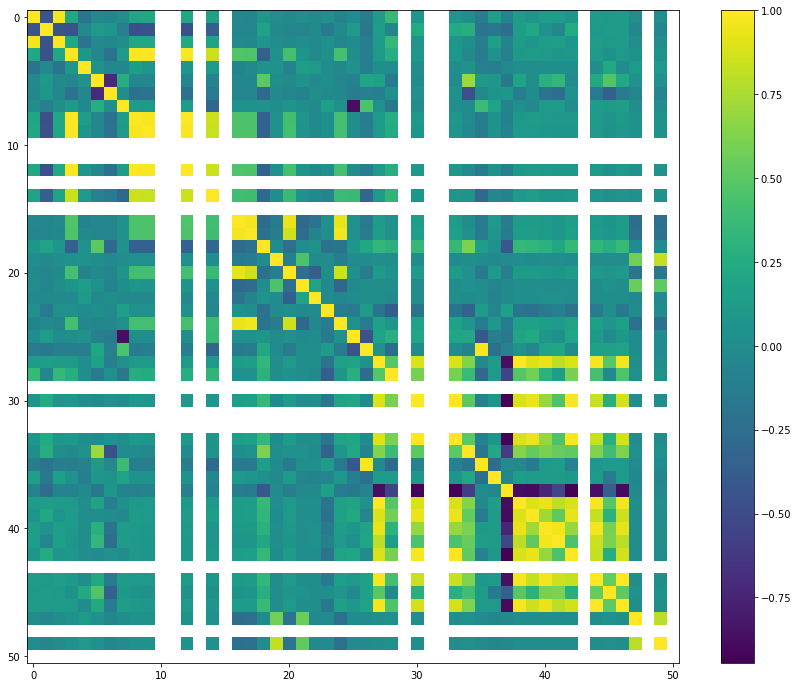

In [8]:
fig= mplot.figure(num=1,figsize=(15,12))
mplot.imshow(data_comb.iloc[:,0:53].corr())
mplot.colorbar()
mplot.savefig("sel_data_correlation",bbox='tight')
mplot.show()

In [9]:
data_mat = data_comb.values
Y = data_mat[:,52].copy()
# Finding set of different states in the state of machine
set_states=set(Y)
set_states=sorted(set_states)

### Now we split the data into Training set, Validation set and Test set
We are splitting the combined data into:
1. 50% training set
2. 25% Validation set
3. 25% Test set

In [ ]:
X = data_mat[:,1:52]
# X[0:5]
X_train, X_tt, Y_train, Y_tt = train_test_split(X, Y,stratify=Y,test_size=0.5, random_state = 15)
X_val, X_test, Y_val, Y_test = train_test_split(X_tt, Y_tt,stratify=Y_tt,test_size=0.5, random_state =30)
X_for_var=X_train.copy()
print('Training Data Size : ', X_train.shape, Y_train.shape)

In [ ]:
# k=10
# pca=PCA(n_components=k)
# pca.fit(data_comb.iloc[:,1:52])
# sum(pca.explained_variance_ratio_[0:k])
# # 0.9996778726329446

### Through PCA we find that retaining 10 features gives us 99.967787% of information is kept
Then we select 10 best features from the whole data, using features selection with chi square.

In [442]:
sel = SelectKBest(chi2, k=10)
sel.fit(X_train,Y_train)
X_train = sel.transform(X_train)
X_train.shape

(9618, 10)

### Printing top 10 features retained 

In [443]:
indices = sel.get_support(True)
indices = np.concatenate((indices,np.array([51])))
data_comb.columns[indices+1]

Index(['LIT101', 'AIT201', 'AIT203', 'LIT301', 'AIT401', 'AIT402', 'LIT401',
       'AIT502', 'PIT501', 'PIT503', 'Normal/Attack'],
      dtype='object')

#### Selecting same 10 features for test set and validation set

In [444]:
X_test = sel.transform(X_test)
X_val = sel.transform(X_val)
X_test.shape

(4810, 10)

### The selected data looks like below 

In [445]:
new_data = data_comb[data_comb.columns[indices+1]]
new_data.head()

,LIT101,AIT201,AIT203,LIT301,AIT401,AIT402,LIT401,AIT502,PIT501,PIT503,Normal/Attack
0,502.7101,261.3753,444.4501,855.4297,0.0,192.2840,921.6099,178.7234,254.1015,193.2037,Normal
1,501.4540,261.2471,443.2710,857.4725,0.0,192.2584,921.9559,178.5696,254.1656,193.2037,Normal
2,500.5119,261.3432,442.0661,860.3163,0.0,192.5916,921.6099,178.6209,254.4860,193.5401,Normal
3,502.6316,261.2791,439.4514,883.3472,0.0,192.2328,909.6514,178.4671,253.9573,193.0114,Normal
4,500.6689,261.2791,438.5799,891.3179,0.0,192.2840,903.4222,178.5183,254.1816,193.0595,Normal


In [362]:
class emodel:
    '''
    This is a class for a individual model in an ensemble model.
    '''
    # Constructor
    def __init__(self, name, **kwargs):
        self.em = None
        self.name = name
        # Check for type of model
        '''
        Only following models allowed you can check the meaning in import statements
        '''
        if(self.name == 'RFC'):
            self.em = RFC(**kwargs)
        elif(self.name == 'LGR'):
            self.em = LGR(**kwargs)
        elif(self.name == 'LNR'):
            self.em = LNR(**kwargs)
        elif(self.name == 'SVM'):
            self.em = SVM(**kwargs)
        elif(self.name == 'MLP'):
            self.em = MLP(**kwargs)
        elif(self.name == 'GNB'):
            self.em = GNB(**kwargs)
        elif(self.name == 'RNC'):
            self.em = RNC(**kwargs)
        elif(self.name == 'KNC'):
            self.em = KNC(**kwargs)
        else:
            pass
    def fit(self,X,Y):
        '''
        Training this model
        '''
        self.em.fit(X,Y)
    def predict(self,X):
        '''
        predicting using this model
        '''
        return self.em.predict(X)

In [368]:
class classifier:
    '''
    Ensemble Model
    
    What does it do?
    -------------------
    Applies PCA on data
    Normalizes data
    Trains individual models
    Predicts the classes and score
    '''
    # Constructor
    def __init__(self):
        self.models = [] #List of individual models
        self.fr = None
      
    # setting presets mean and standard deviation to normalize each test point
    def normalize_set(self,X): 
        '''
        Setting the training data mean and std to normalize test data too
        '''
        self.mu = X.mean(axis=0)
        self.std = X.std(axis=0)
        for i in range(len(self.std)): # removing any zero valued standard deviation.
            if(self.std[i] == 0):
                self.std[i] = 1e-60 #If std is zero make is near to 0 to avoid 1/0 error
    
    # normalizing X with presets
    def normalize(self, X):
        '''
        Normalize X with presetted mean and std
        '''
        X_norm = (X - self.mu)/(self.std)
        return X_norm
        
    # Fuction to append a new model
    def append(self, name, **kwargs):
        '''
        Add Models to the list of individual models.
        '''
        var = emodel(name, **kwargs)
        if(var.em != None):
            self.models.append(var)
        else:
            pass
    
    # PCA applied for feature reduction
    def reduce_feature(self, X, tol = 0.99):
        '''
        Feature reduction PCA
        
        X   : N x D shape data matrix
        tol : tolerance over data information to be kept
        '''
        for i in range(X.shape[1]):
            self.fr = PCA(n_components = i)
            self.fr.fit(X)
            tot = np.sum(self.fr.explained_variance_ratio_[0:i])
            if(tot >= tol):
                break;
        self.ndims = self.fr.explained_variance_ratio_.shape[0]

        X_red = self.fr.transform(X) 
        self.normalize_set(X_red)
        
    # Training all models
    def train(self, X, Y, Xval, Yval):
        '''
        Training the models
        '''
#         X_red = self.fr.transform(X) 
#         X_red_nor = self.normalize(X_red)
        # training each model individually
        for model in self.models:
            '''
            Training each model individually
            '''
            model.fit(X,Y)
        
        
    # taking predictions from all the models
    def vote(self,X):
        '''
        Arbiter Models
        
        Takes votes of all the models
        '''
        votes = None
        flag = False
        for model in self.models:
            var = model.predict(X)
            if(not flag):
                votes = var.reshape(-1,1)
                flag = True
            else:
                votes = np.hstack((votes,var.reshape(-1,1)))
        
        return votes

    # To calculate accuracy
    def score(self,X,Y):
        '''
        Calculates the accuracy of ensemmble model.
        '''
        
        Yp = self.predict(X)
        cper = np.sum(Yp.reshape(-1,1) == Y.reshape(-1,1))/Y.shape[0]
        return cper
    
    # To predict class
    def predict(self, X):
        '''
        Predicts the class array of a given input array
        '''
        
#         X_red = self.fr.transform(X)
#         Xt = self.normalize(X_red)
        
        votes = self.vote(X)
        Y = np.squeeze(stats.mode(votes,axis=1)[0])
        return Y

In [340]:
X_train.shape[1]

10

#### Data visualization of each feature with respect to other in top 10 features

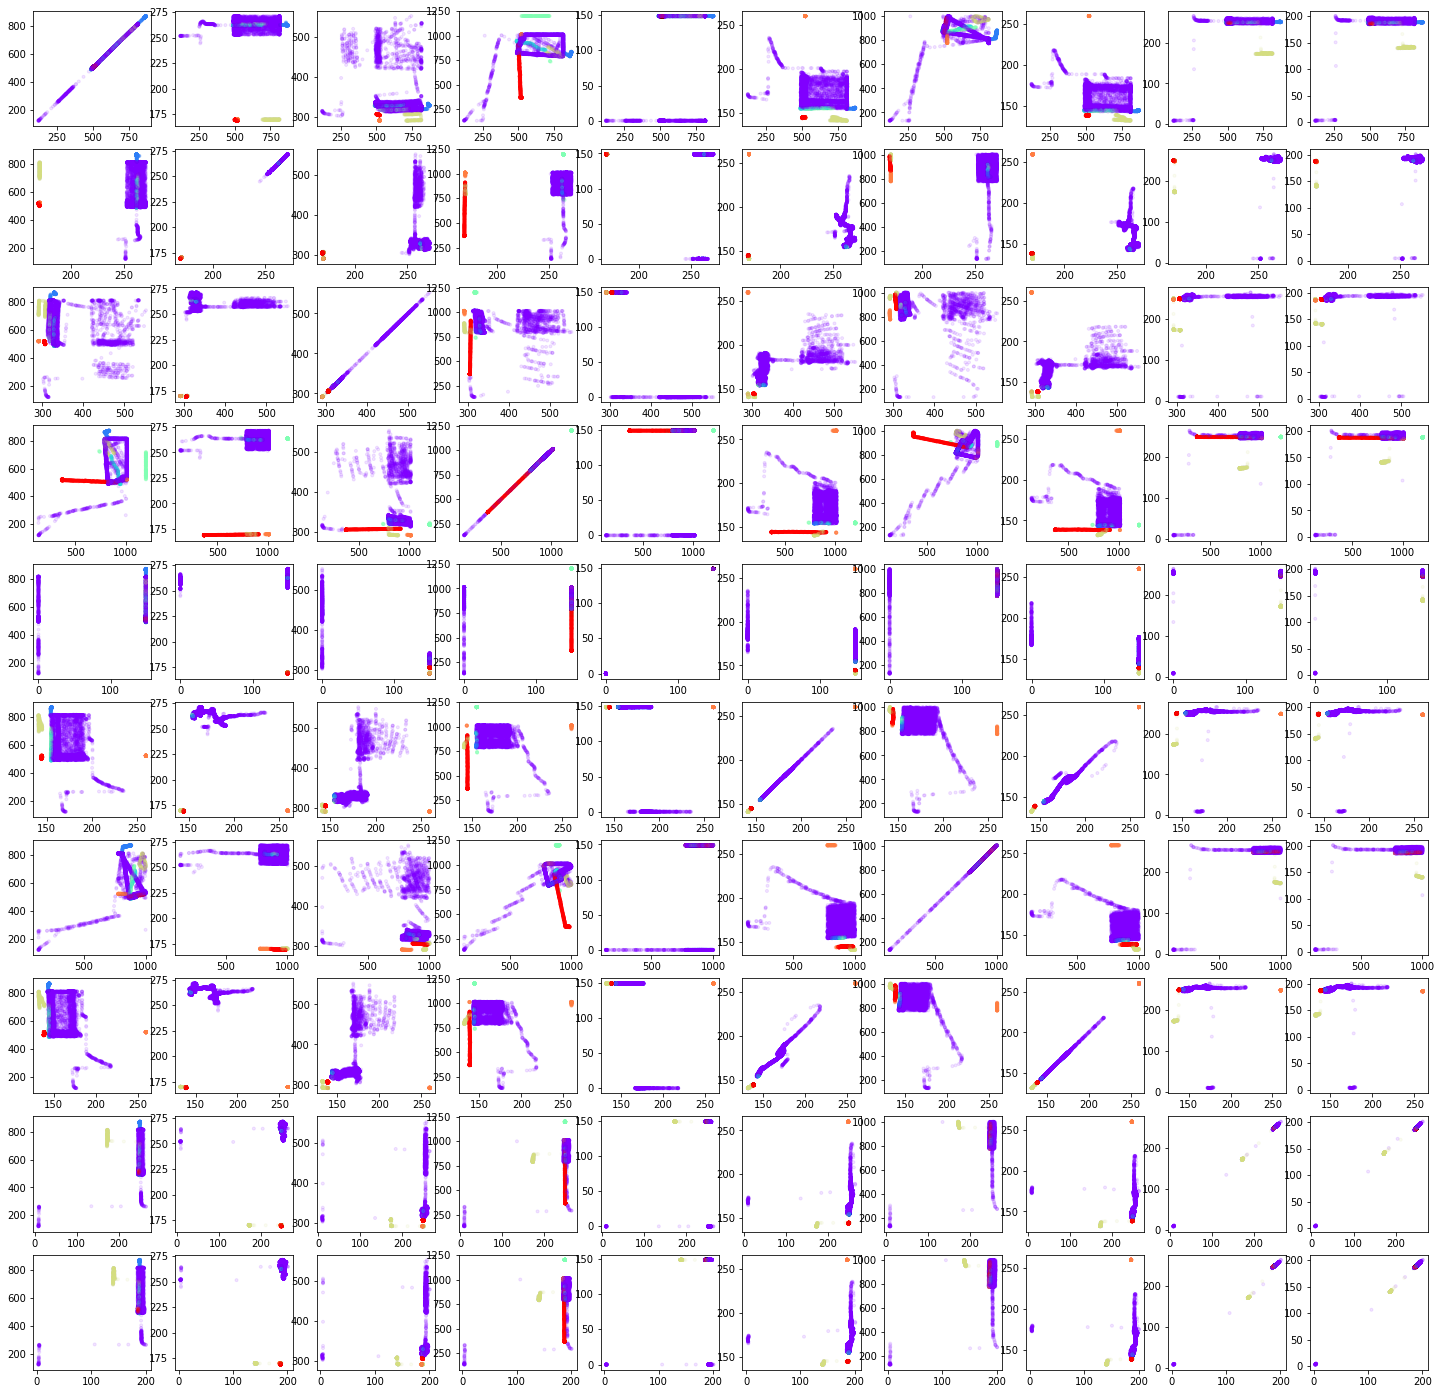

In [346]:
Y_plot=np.zeros(Y_train.size)
set_states=set(Y_train)
for state in set_states:
    if state!='Normal':
        Y_plot[Y_train==state]=int(state[len(state)-1])
    else:
        Y_plot[Y_train==state]=0
ndims=X_train.shape[1]
fig, ax = mplot.subplots(ndims,ndims,figsize =[25,25])
for i in range(ndims):
    for j in range(ndims):
        ax[i][j].scatter(X_train[:,i],X_train[:,j],c = Y_plot, cmap="rainbow", marker ='.', alpha = 0.1)
# plt.savefig('scatterplot.png')
mplot.show()

### Creating object of class model and visualising the information kept on applying PCA with different number of features selected

In [446]:
model = classifier()
model.reduce_feature(X_for_var,tol=0.9995)
X_red = model.fr.transform(X_for_var)
X_red_nor = model.normalize(X_red)

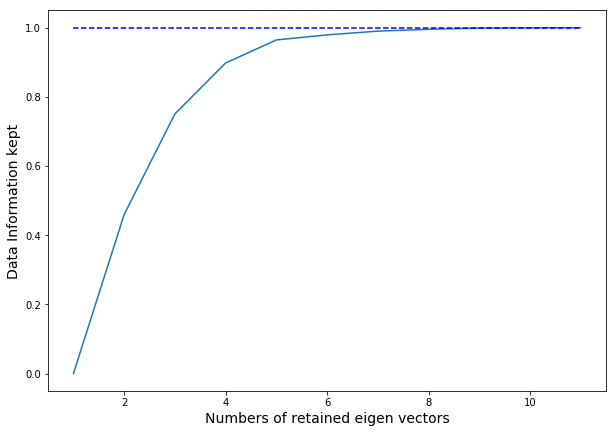

In [447]:
lams = model.fr.explained_variance_ratio_
sums = [np.sum(lams[0:i]) for i in range(lams.shape[0]+1)]
fig=mplot.figure(num=3,figsize=(10,7))
mplot.plot([1,2,3,4,5,6,7,8,9,10,11],sums)
mplot.plot([1,lams.shape[0]+1],[1,1],'b--')
mplot.xlabel("Numbers of retained eigen vectors", fontsize="14")
mplot.ylabel("Data Information kept", fontsize="14")
mplot.savefig("num_eign_info.png")
mplot.show()

#### Storing the models we are going to use for training using ensemble method

In [448]:
model.models = [] # lsit of models (empty intially)
model.append('LGR', random_state=1) # logistic regression
model.append('RFC', random_state=1) # random forest
model.append('SVM', kernel = 'poly', degree = 5, random_state=1) # support vecotr polynomial kernel degree = 3
# model.append('SVM', kernel = 'poly', degree = 8, random_state=1) # support vecotr polynomial kernel degree = 3
model.append('MLP', solver='lbfgs', alpha=1, hidden_layer_sizes=(5,5,2), max_iter = 10000, random_state = 10)
X_train.shape,X_val.shape

((9618, 10), (4809, 10))

In [449]:
model.train(X_train, Y_train, X_val, Y_val) # training the ensembel model

In [450]:
var_test = model.score(X_test,Y_test)
var_val = model.score(X_val,Y_val)
var_train = model.score(X_train,Y_train)
print('Test Accuracy:',var_test,'\nVal Accuracy:',var_val,'\nTrain Accuracy:',var_train)

Test Accuracy: 1.0 
Val Accuracy: 1.0 
Train Accuracy: 1.0


In [421]:
# LGR+RFC+SVM(5)+SVM(8)+MLP
# Test Accuracy: 0.9993762993762993 
# Val Accuracy: 0.9993761696818465 
# Train Accuracy: 0.9993761696818465
# LGR+RFC+SVM(5)+SVM(8)
# Test Accuracy: 1.0 
# Val Accuracy: 1.0 
# Train Accuracy: 1.0
# LGR+RFC+SVM(5)
# Test Accuracy: 1.0 
# Val Accuracy: 1.0 
# Train Accuracy: 1.0
# LGR+RFC
# Test Accuracy: 0.9991683991683992 
# Val Accuracy: 0.9989602828030776 
# Train Accuracy: 0.9990642545227698
# LGR
# Test Accuracy: 0.9985446985446985 
# Val Accuracy: 0.9983364524849241 
# Train Accuracy: 0.9984404242046163
# RFC
# Test Accuracy: 1.0 
# Val Accuracy: 1.0 
# Train Accuracy: 1.0
# SVM(5)
# Test Accuracy: 0.9993762993762993 
# Val Accuracy: 0.999168226242462 
# Train Accuracy: 1.0
# SVM(8)
# Test Accuracy: 0.7796257796257796 
# Val Accuracy: 0.7797878976918278 
# Train Accuracy: 0.7797878976918278
# MLP(5,5,2)
# Test Accuracy: 0.8667359667359668 
# Val Accuracy: 0.866916198793928 
# Train Accuracy: 0.8668122270742358
# LGR+RFC+SVM(5)+MLP
# Test Accuracy: 1.0 
# Val Accuracy: 1.0 
# Train Accuracy: 1.0

In [451]:
Y_preds_test = model.predict(X_test)
Y_preds_train = model.predict(X_train)
Y_preds_val = model.predict(X_val)

In [452]:
print("Test data confusion matrix\n--------------------------------")
print(confusion_matrix(Y_test, Y_preds_test))

Test data confusion matrix
--------------------------------
[[ 235    0    0    0    0    0    0]
 [   0  111    0    0    0    0    0]
 [   0    0  107    0    0    0    0]
 [   0    0    0  118    0    0    0]
 [   0    0    0    0   70    0    0]
 [   0    0    0    0    0  419    0]
 [   0    0    0    0    0    0 3750]]


In [453]:
print("Train data confusion matrix\n--------------------------------")
print(confusion_matrix(Y_train, Y_preds_train))

Train data confusion matrix
--------------------------------
[[ 470    0    0    0    0    0    0]
 [   0  221    0    0    0    0    0]
 [   0    0  215    0    0    0    0]
 [   0    0    0  234    0    0    0]
 [   0    0    0    0  141    0    0]
 [   0    0    0    0    0  837    0]
 [   0    0    0    0    0    0 7500]]


In [454]:
print("Validation data confusion matrix\n--------------------------------")
print(confusion_matrix(Y_val, Y_preds_val))

Validation data confusion matrix
--------------------------------
[[ 235    0    0    0    0    0    0]
 [   0  111    0    0    0    0    0]
 [   0    0  107    0    0    0    0]
 [   0    0    0  117    0    0    0]
 [   0    0    0    0   70    0    0]
 [   0    0    0    0    0  419    0]
 [   0    0    0    0    0    0 3750]]
